# Twitter Dataframe Wrangling - WeRateDogs
> by Simba Pfaira

## Imports of required modules
> Firstly I will import the python packages that I will be using in this project. 

In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Gathering Data

### 1. The Twitter Archive Enhanced
> I will start by reading the `.csv` file provided into a pandas DataFrame, and then show the first few rows using the `.head()` functioin.

In [2]:
df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_enhanced.head(2).T

,0,1
tweet_id,892420643555336193,892177421306343426
in_reply_to_status_id,NaN,NaN
in_reply_to_user_id,NaN,NaN
timestamp,2017-08-01 16:23:56 +0000,2017-08-01 00:17:27 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....
retweeted_status_id,NaN,NaN
retweeted_status_user_id,NaN,NaN
retweeted_status_timestamp,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/892420643...,https://twitter.com/dog_rates/status/892177421...


### 2. The tweet image predictions
> I will start by getting the data from the cloud using the `request` module, save it to a local file and read it to a dataframe.

In [3]:
import requests
data_url  = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
result = requests.get(data_url)
# Saving the data to a local file
with open('image-predictions.tsv', 'wb') as file:
    file.write(result.content)
   

In [4]:
# Reading thew file into a dataframe
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


###  3. Data from the Twitter API
> Using the `tweet_id` in the WeRateDogs Twitter archive, I will query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. Then I will gather each tweet's `retweet_count` and `favorite_count` at the minimum and any additional data I might find interesting. 

In [5]:
# Setting up the imports and environment variables
import tweepy

consumer_key = 'key'
consumer_secret = 'secret'
access_token = 'token'
access_secret = 'secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
# Handled the rate limits which are imposed by twittwer, the program  will have to wait until the rate limit is lifted

In [6]:
# Testing the API
sample_tweet_id = df_enhanced.tweet_id[0]
tweet_request = api.get_status(sample_tweet_id, tweet_mode='extended')
tweet_result = tweet_request._json
#print(tweet_result)
tweet_result

> I implemented the try and catch to avoid errors caused by the tweets which may have been deleted. 


In [7]:
# Gathering the whole dataset and writing  twitter JSON file
with open('tweet_json.txt','w') as json_file:
    for tweet_id in df_enhanced['tweet_id'][:2]:
        try:
            tweet = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet._json, json_file)
            json_file.write("\n")
        except Exception as e:
            print(str(e))

In [8]:
# Reading the JSON file to a dataframe
api_tweets = []
with open('tweet_json.txt') as json_file:
    json_data = json.load(json_file)
    for item in json_data:
        #Selecting columns of interest
        api_tweets.append({'tweet_id': item['id'],
                        'retweet_count': item['retweet_count'], 
                        'favorite_count': item['favorite_count'],
                        'followers_count': item['user']['followers_count'],
                        'timestamp': pd.to_datetime(item['created_at'])})

df_twitter_api = pd.DataFrame(api_tweets)
df_twitter_api.head().T

,0,1,2,3,4
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256
retweet_count,8377,6185,4092,8519,9227
favorite_count,38250,32791,24693,41578,39754
followers_count,7418513,7418513,7420630,7418513,7418513
timestamp,2017-08-01 16:23:56+00:00,2017-08-01 00:17:27+00:00,2017-07-31 00:18:03+00:00,2017-07-30 15:58:51+00:00,2017-07-29 16:00:24+00:00


## Step 2: Assessing Data

In this section I will visually and programatically assess all the three datasets, and at the end I will document the quality and tidiness issues I discover in these datasets. For visual assessment I will use the `.info()` and the `.head().T` method, and programmatically I will use `duplicated()`, `value_counts()` method.

### 1. The enhanced data set from Udacity

In [9]:
df_enhanced.head().T

,0,1,2,3,4
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256
in_reply_to_status_id,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN
timestamp,2017-08-01 16:23:56 +0000,2017-08-01 00:17:27 +0000,2017-07-31 00:18:03 +0000,2017-07-30 15:58:51 +0000,2017-07-29 16:00:24 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...
retweeted_status_id,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,NaN
retweeted_status_timestamp,NaN,NaN,NaN,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/892420643...,https://twitter.com/dog_rates/status/892177421...,https://twitter.com/dog_rates/status/891815181...,https://twitter.com/dog_rates/status/891689557...,https://twitter.com/dog_rates/status/891327558...


In [10]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
df_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [12]:
df_enhanced.duplicated().sum()
# The dataset has no duplicate

0

In [13]:
(df_enhanced.rating_denominator != 10).sum()

23

### 2. The file image predictions dataset

In [14]:
df_predictions.head().T

,0,1,2,3,4
tweet_id,666020888022790149,666029285002620928,666033412701032449,666044226329800704,666049248165822465
jpg_url,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
img_num,1,1,1,1,1
p1,Welsh_springer_spaniel,redbone,German_shepherd,Rhodesian_ridgeback,miniature_pinscher
p1_conf,0.465074,0.506826,0.596461,0.408143,0.560311
p1_dog,True,True,True,True,True
p2,collie,miniature_pinscher,malinois,redbone,Rottweiler
p2_conf,0.156665,0.074192,0.138584,0.360687,0.243682
p2_dog,True,True,True,True,True
p3,Shetland_sheepdog,Rhodesian_ridgeback,bloodhound,miniature_pinscher,Doberman


> By using info() method I can see that the file image predictions data frame has 12 columns and 2075 rows.

In [15]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_predictions['jpg_url'].duplicated().sum()

66

### 3. The twitter api dataset

> By using the transposed `head()` method I can see the colums of the data set and the first few lines of the data it contains.

In [17]:
df_twitter_api.head().T

,0,1,2,3,4
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256
retweet_count,8377,6185,4092,8519,9227
favorite_count,38250,32791,24693,41578,39754
followers_count,7418513,7418513,7420630,7418513,7418513
timestamp,2017-08-01 16:23:56+00:00,2017-08-01 00:17:27+00:00,2017-07-31 00:18:03+00:00,2017-07-30 15:58:51+00:00,2017-07-29 16:00:24+00:00


>  By using info() method I can see that the file image predictions data frame has 5 columns and 2342 rows.

In [18]:
df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         2342 non-null   int64              
 1   retweet_count    2342 non-null   int64              
 2   favorite_count   2342 non-null   int64              
 3   followers_count  2342 non-null   int64              
 4   timestamp        2342 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(4)
memory usage: 91.6 KB


In [19]:
df_twitter_api.duplicated().sum()

0

## Quality and Tidiness Issues Discovered
### 1. Quality issues
#### a. The enhaced dataframe
* From the `.info()` method I discovered that `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, and `retweeted_status_user_id` are not of the same type,even though they are all IDs. Most of them are floats and one of them is of integer type. They should all be converted to strings instead because there are no arithmetical operations that can be performed on them.
* Moreover the `retweeted_status_timestamp`, `timestamp` should be `date_time` type instead of `string`, because they represent time.
* Also, there are some columns with null objects that are non-null because they have a value of `None`. This will distort the dataframe when we are looking for null values.

* From the `value_counts` I discovered that the `name` column have inappropriate names e.g. `a`, and 745 `None` values. 
* I also observed that a total of 20 ratings do not have the denominator value as 10, which the denominator for many entries.


#### b. The image predictions dataframe
* The dataframe has 2075 rows which means there is data that is missing since the enhanced dataset has 2356 rows.
* The `tweet_id` is of integer type, thus should all be converted to strings instead because there are no arithmetical operations that can be performed on them.
* The `duplicated()` method revealed that there are duplicated `jpg_url` values, which suggests that 66 tweets has the same dog picture.
* Inconsistent formating of the predicted dog names, some are in lowercase others are separated by an underscore.
#### c. The Twitter API dataframe
* The `df_enhanced` dataset has `2356` rows and the `twitter_api` dataframe has 2342 entries, which means that 14 tweets could not be retrieved, because either the tweets were deleted or the Ids were invalid.
* The `tweet_id` is of integer type, thus should all be converted to strings instead because there are no arithmetical operations that can be performed on them.

### 2. Tidiness
* The various stages of dogs in the four columns namely `doggo`, `floofer`, `pupper` and `puppo` should be merged to form one column.
* All the three dataframes should be part of a single dataset.

NB : We could add a column called jpg_url_api contain the query of the api media_url_https it will have the same result as the images dataset
We may want to add a gender column from the text columns in archives dataset

## Cleaning
> Cleaning our data is the third step in data wrangling. It is where we will fix the quality and tidiness issues that we identified in the `assessing data` stage above.


### 1. Dropping the unnecessary columns
>  Next I will start by dropping columns the columns that relate to retweets in the `df_enhanced` dataframe since we only want original tweets. I will also drop the `source` and `expanded_url` column since I will not use it in my project. I will also drop the `timestamp` column in the `df_twitter_api` dataframe as it contains same info with the `timestamp` column of the `df_enhanced` dataframe

In [20]:
# Code
df_enhanced.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp', 'source', 'expanded_urls'], axis=1, inplace = True)
df_twitter_api.drop(['timestamp'], axis=1, inplace = True)
# Test
df_enhanced.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### 2. Changing the datatypes
> Secondly I will change the datatypes of columns of the datasets which has the issues as detected in the `Assessing Data` section. The columns to be changed are as follows:
> * `df_enhanced` dataframe `timestamp` column from string to datetime
> * `df_twitter_api` dataframe `timestamp` column from string to datetime
> * `df_enhanced` dataframe `tweet_id` column from integer to string
> * `df_predictions` dataframe `tweet_id` column from integer to string
> * `df_twitter_api` dataframe `tweet_id` column from integer to string

In [21]:
# Code
df_enhanced['timestamp'] = pd.to_datetime(df_enhanced['timestamp'])
df_enhanced['tweet_id'] = df_enhanced['tweet_id'].astype(str)
df_predictions['tweet_id'] = df_predictions['tweet_id'].astype(str)
df_twitter_api['tweet_id'] = df_twitter_api['tweet_id'].astype(str)

# Test
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   rating_numerator    2356 non-null   int64              
 4   rating_denominator  2356 non-null   int64              
 5   name                2356 non-null   object             
 6   doggo               2356 non-null   object             
 7   floofer             2356 non-null   object             
 8   pupper              2356 non-null   object             
 9   puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 184.2+ KB


### 3. Replacing None
> The next thing I will replace the `None` values with `np.nan` values and also the rows with `name` value as `a`.

In [22]:
### CODE
df_enhanced.replace('None', np.nan, inplace = True)
df_enhanced.name.replace('a', np.NaN, inplace = True)

### TEST
df_enhanced.head().T

,0,1,2,3,4
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256
timestamp,2017-08-01 16:23:56+00:00,2017-08-01 00:17:27+00:00,2017-07-31 00:18:03+00:00,2017-07-30 15:58:51+00:00,2017-07-29 16:00:24+00:00
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...
rating_numerator,13,13,12,13,12
rating_denominator,10,10,10,10,10
name,Phineas,Tilly,Archie,Darla,Franklin
doggo,NaN,NaN,NaN,NaN,NaN
floofer,NaN,NaN,NaN,NaN,NaN
pupper,NaN,NaN,NaN,NaN,NaN
puppo,NaN,NaN,NaN,NaN,NaN


### 4. Properly formatting names
> The next thing is to properly format the predicted dog names in the `df_predictions` dataframe columns `p1`, `p2` and `p3`. i will start by firstly removing the underscore between two words in the columns. Secondly I will convert the names to uppercase for the first letter and lowercase for the rest of the letters.

In [23]:
### CODE
# Stage 1
df_predictions['p1'] = df_predictions['p1'].str.replace('_', ' ')
df_predictions['p2'] = df_predictions['p2'].str.replace('_', ' ')
df_predictions['p3'] = df_predictions['p3'].str.replace('_', ' ')

# Stage 2
df_predictions['p1'] = df_predictions['p1'].str.title()
df_predictions['p2'] = df_predictions['p2'].str.title()
df_predictions['p3'] = df_predictions['p3'].str.title()

### TEST
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 5. Merge  dogs stages
> In this stage I will combine all three dogs' stages into one single column and then drop the empty rows

In [24]:
### CODE
df_enhanced.replace('None', np.nan, inplace = True)
df_enhanced['stage'] = df_enhanced[['doggo', 'floofer', 'pupper', 'puppo']].fillna('').sum(axis=1).astype(str)
df_enhanced = df_enhanced.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1)
df_enhanced['stage']  = df_enhanced['stage'] .replace('doggopupper', 'doggo')
df_enhanced['stage']  = df_enhanced['stage'] .replace('doggopuppo', 'puppo')
df_enhanced['stage'] = df_enhanced['stage'] .replace('doggofloofer', 'floofer')

### TEST
df_enhanced['stage'].value_counts()

           1976
pupper      245
doggo        95
puppo        30
floofer      10
Name: stage, dtype: int64

### 6. Merging all three dataframes
> The next thing I will merge the  dataframes into a single dataframe using 'tweeter_id'

In [25]:
df_first_merge = pd.merge(df_enhanced, df_predictions, on = 'tweet_id', how ='inner')
df_combined = pd.merge(df_first_merge, df_twitter_api, on = 'tweet_id', how ='inner')
df_combined.head().T

,0,1,2,3,4
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256
timestamp,2017-08-01 16:23:56+00:00,2017-08-01 00:17:27+00:00,2017-07-31 00:18:03+00:00,2017-07-30 15:58:51+00:00,2017-07-29 16:00:24+00:00
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...
rating_numerator,13,13,12,13,12
rating_denominator,10,10,10,10,10
name,Phineas,Tilly,Archie,Darla,Franklin
stage,,,,,
jpg_url,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
img_num,1,1,1,1,2
p1,Orange,Chihuahua,Chihuahua,Paper Towel,Basset


In [26]:
df_combined.drop(['timestamp', 'jpg_url', 'img_num'], axis=1, inplace=True)
df_combined.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'stage', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count',
       'followers_count'],
      dtype='object')

## Storing the data

In [27]:
# Store the clean DataFrame in a CSV file
df_combined.to_csv('twitter_archive_combined.csv', index=False, encoding = 'utf-8')

## Visualizing and Analyzing

### 1. Data description
> By using the `describe` method I discovered that-:
> * 75% of the dogs received a rating of 12 and below.
> * The most favourited post received 165 031 likes.


In [28]:
df_combined.describe()

,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,followers_count
count,2068.000000,2068.000000,2068.000000,2.068000e+03,2.068000e+03,2068.000000,2068.000000,2.068000e+03
mean,12.263056,10.513056,0.594944,1.345462e-01,6.028703e-02,2824.509671,8462.479207,7.418640e+06
std,40.749075,7.189152,0.271201,1.007553e-01,5.094828e-02,4909.535881,12736.435294,2.283842e+02
min,0.000000,2.000000,0.044333,1.011300e-08,1.740170e-10,12.000000,0.000000,7.418512e+06
25%,10.000000,10.000000,0.364570,5.352722e-02,1.616932e-02,601.750000,1612.000000,7.418540e+06
50%,11.000000,10.000000,0.588620,1.181350e-01,4.933745e-02,1329.500000,3727.500000,7.418628e+06
75%,12.000000,10.000000,0.845599,1.955617e-01,9.198323e-02,3262.250000,10604.750000,7.418686e+06
max,1776.000000,170.000000,1.000000,4.880140e-01,2.734190e-01,84221.000000,165031.000000,7.420830e+06


### 2. Most frequent names

In [29]:
frequent_names = df_combined['name'].value_counts().nlargest(10)
frequent_names 

Tucker     10
Penny      10
Lucy       10
Charlie    10
Cooper     10
Oliver     10
Winston     8
Sadie       8
Lola        8
Bo          8
Name: name, dtype: int64

<AxesSubplot:>

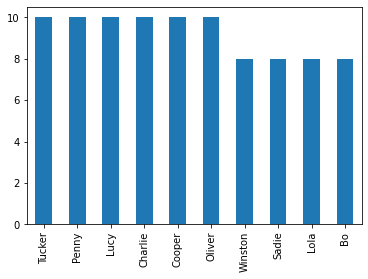

In [30]:
frequent_names.plot.bar()

### 3. Most frequent dog stages

In [31]:
frequent_stage = df_combined['stage'].value_counts().nlargest(10)
frequent_stage 

           1747
pupper      211
doggo        78
puppo        24
floofer       8
Name: stage, dtype: int64

<AxesSubplot:>

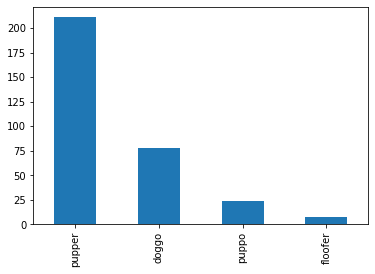

In [32]:
frequent_stage[1:].plot.bar()

### 4. Favourites and retweets for each dog stage

Text(0.5, 1.0, 'The Number of Favorites and Retweets at Each Stage')

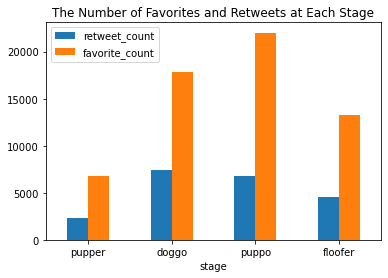

In [33]:
categories =['pupper','doggo','puppo','floofer']
retweet_count_average=df_combined.groupby('stage')[['retweet_count', 'favorite_count']].mean()
ax = retweet_count_average.loc[categories].plot(kind="bar")
plt.xticks(rotation =360)
plt.title('The Number of Favorites and Retweets at Each Stage')

> The chart shows that `puppo` were favorited a lot. However this is because the total count of `puppo` is greater than any other dog stage. Another noticeable thing , is that favorites are always greater than retweets for any dog stage.

## References 
1. [Twitter API - get tweets with specific id](https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id) accessed on 20 June 2022.
1. [Handling Exceptions](https://wiki.python.org/moin/HandlingExceptions) accessed on 20 June 2022.
1. [Reading and Writing JSON to a File in Python](https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/) accessed on 20 June 2022.